In [9]:
pip install fastparquet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 56.9 MB/s eta 0:00:00


In [7]:
# conda create -n pi_env python=3.9
# conda activate pi_env
# pip install pandas
# pip install seaborn
# pip install matplotlib
# pip install fastparquet

SyntaxError: invalid syntax (<ipython-input-7-77dd7026c48e>, line 1)

## Librerías

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Option 1: Using pandas display options
pd.options.display.float_format = '{:.6f}'.format  # Display up to 6 decimal places

Importar la base de datos

In [11]:
#data_raw = pd.read_parquet(r"..\Modelo_CA_Mama\Data_Ca_Mama.parquet", engine='fastparquet')
data_raw = pd.read_parquet(r"Data_Ca_Mama.parquet", engine='fastparquet')
data_raw.head()

,Afiliado_Id,Ind_Frecuencia_Licor,Sexo_Cd,Raza_Desc,Valor_IMC,Num_Edad_Menopausia,Num_Edad_Menarca,Ind_Terapia_Hormonal,Num_Birads,Ind_Ooforectomia_Bilateral,Num_Fam_Primer_Grado_Otros,Num_Fam_Segundo_Grado_Otros,Ind_Ant_Fam_Otros,Num_Fam_Primer_Grado_CAM,Num_Fam_Segundo_Grado_CAM,Ind_Ant_Fam_CAM,Ind_Ant_Radio_Torax,Edad,Ind_CAM
0,6915312.000000,None,F,SIN INFORMACION DESDE LA FUENTE,29.010000,NaN,13.000000,No,None,No,0.000000,0.000000,No,0.000000,0.000000,No,No,34.000000,No
1,1520483.000000,None,F,MESTIZO,NaN,NaN,14.000000,No,None,No,0.000000,0.000000,No,0.000000,0.000000,No,No,40.000000,No
2,10964151.000000,Si,F,SIN INFORMACION DESDE LA FUENTE,33.010000,NaN,NaN,No,None,No,0.000000,0.000000,No,0.000000,0.000000,No,Si,41.000000,No
3,10814984.000000,No,F,SIN INFORMACION DESDE LA FUENTE,23.340000,NaN,NaN,No,None,No,0.000000,0.000000,No,0.000000,0.000000,No,No,25.000000,No
4,1301025.000000,No,F,MESTIZO,24.670000,NaN,9.000000,No,1,No,0.000000,0.000000,No,0.000000,0.000000,No,No,61.000000,No


# Comprensión de los datos

In [12]:
# Revisar las variables que están en el DataFrame
data_raw.columns

Index(['Afiliado_Id', 'Ind_Frecuencia_Licor', 'Sexo_Cd', 'Raza_Desc',
       'Valor_IMC', 'Num_Edad_Menopausia', 'Num_Edad_Menarca',
       'Ind_Terapia_Hormonal', 'Num_Birads', 'Ind_Ooforectomia_Bilateral',
       'Num_Fam_Primer_Grado_Otros', 'Num_Fam_Segundo_Grado_Otros',
       'Ind_Ant_Fam_Otros', 'Num_Fam_Primer_Grado_CAM',
       'Num_Fam_Segundo_Grado_CAM', 'Ind_Ant_Fam_CAM', 'Ind_Ant_Radio_Torax',
       'Edad', 'Ind_CAM'],
      dtype='object')

In [13]:
data_raw.shape

(2190279, 19)

Se tiene un total de 2.190.279 registros, con 19 variables.

In [14]:
# Cantidad de registros por población sana y enferma
data_raw.Ind_CAM.value_counts()

,count
Ind_CAM,
No,2172026
Si,18253


- Casos positivos: 18.253 mujeres afiliadas con diagnóstico positivo de cáncer de mama.
- Casos negativos: 2.172.026 mujeres sin diagnóstico de cáncer de mama.

## Calidad de los datos

### Duplicidad

In [15]:
# Contar el número de filas duplicadas
num_duplicated = data_raw.duplicated().sum()
print(f"Número de filas duplicadas: {num_duplicated}")

Número de filas duplicadas: 66


In [16]:
# Eliminar registros duplicados
data_raw = data_raw.drop_duplicates()

### Completitud

In [18]:
# Calcular el porcentaje de valores faltantes por columna
missing_percentage = data_raw.isnull().mean() * 100
print('Porcentaje de valores faltantes por columna:')
missing_percentage[missing_percentage > 0]

Porcentaje de valores faltantes por columna:


,0
Ind_Frecuencia_Licor,33.812876
Valor_IMC,11.055957
Num_Edad_Menopausia,98.576075
Num_Edad_Menarca,59.428238
Num_Birads,77.865304


In [19]:
data_raw.Edad.describe()

,Edad
count,2190213.000000
mean,43.159533
std,16.741093
min,18.000000
25%,29.000000
50%,40.000000
75%,55.000000
max,139.000000


Se puede apreciar que 98,58% de los registros de la variable edad de menopausia se encuentra vacío. Sin embargo, dado que el 75% de las mujeres en el dataset tienen una edad igual o inferior a los 55 años, el registro es coherente ya que la menopausia es un proceso natural que suele ocurrir entre los 45 y 55 años de edad, aunque la edad promedio es de 51 años.

In [20]:
data_raw[data_raw.Edad > 50].isnull().mean() * 100

,0
Afiliado_Id,0.000000
Ind_Frecuencia_Licor,29.759105
Sexo_Cd,0.000000
Raza_Desc,0.000000
Valor_IMC,9.260842
Num_Edad_Menopausia,95.583001
Num_Edad_Menarca,50.295785
Ind_Terapia_Hormonal,0.000000
Num_Birads,54.927411
Ind_Ooforectomia_Bilateral,0.000000


### Conformidad

In [21]:
# Revisión general del tipo de datos
data_raw.dtypes

,0
Afiliado_Id,float64
Ind_Frecuencia_Licor,object
Sexo_Cd,object
Raza_Desc,object
Valor_IMC,float64
Num_Edad_Menopausia,float64
Num_Edad_Menarca,float64
Ind_Terapia_Hormonal,object
Num_Birads,object
Ind_Ooforectomia_Bilateral,object


In [22]:
data_raw.Afiliado_Id = data_raw.Afiliado_Id.astype('int')
data_raw.Num_Edad_Menarca = data_raw.Num_Edad_Menarca.astype('int', errors= 'ignore')
data_raw.Num_Edad_Menopausia = data_raw.Num_Edad_Menopausia.astype('int', errors= 'ignore')
data_raw.Num_Fam_Primer_Grado_Otros = data_raw.Num_Fam_Primer_Grado_Otros.astype('int', errors= 'ignore')
data_raw.Num_Fam_Segundo_Grado_Otros = data_raw.Num_Fam_Segundo_Grado_Otros.astype('int', errors= 'ignore')
data_raw.Num_Fam_Primer_Grado_CAM = data_raw.Num_Fam_Primer_Grado_CAM.astype('int', errors= 'ignore')
data_raw.Num_Fam_Segundo_Grado_CAM = data_raw.Num_Fam_Segundo_Grado_CAM.astype('int', errors= 'ignore')
data_raw.Edad = data_raw.Edad.astype('int', errors= 'ignore')

Se decide cambiar los datos numericos de float64 a int, exceptuando el Valor de IMC.

Lo siguiente, sería analizar que las categorías de las variables categorícas se encuentren bien.

In [23]:
for column in data_raw.select_dtypes(include=['object']):
    print(f"Categorías en la columna {column}:")
    print(data_raw[column].unique())

Categorías en la columna Ind_Frecuencia_Licor:
[None 'Si' 'No']
Categorías en la columna Sexo_Cd:
['F']
Categorías en la columna Raza_Desc:
['SIN INFORMACION DESDE LA FUENTE' 'MESTIZO' 'BLANCO' 'AFROAMERICANO'
 'MULATO' 'ZAMBO' 'INDÍGENA']
Categorías en la columna Ind_Terapia_Hormonal:
['No' 'Si']
Categorías en la columna Num_Birads:
[None '1' 'BIRA' '2' '0' '4' '3' '6' 'BI-R' 'BI R' 'CATE' '5' 'BI -'
 'CLAS']
Categorías en la columna Ind_Ooforectomia_Bilateral:
['No' 'Si']
Categorías en la columna Ind_Ant_Fam_Otros:
['No' 'Si']
Categorías en la columna Ind_Ant_Fam_CAM:
['No' 'Si']
Categorías en la columna Ind_Ant_Radio_Torax:
['No' 'Si']
Categorías en la columna Ind_CAM:
['No' 'Si']


En general, las categorías de las variables categoricas se encuentran bien. Para la variable raza se encuentra la categoría 'SIN INFORMACION DESDE LA FUENTE' la cual debe ser eliminada ya que no corresponde a una categoría permitida. Por otro lado, en la variable Num_Birads también se encuentran categorías no permitidas como: 'BIRA', 'BI-R', 'BI R', 'CATE', 'BI -', 'CLAS'. Se decide limpiar estas categorías en los registros que aparecen.

In [24]:
# Función para verificar si un valor de BI-RADS es válido
def es_birads_valido(valor):
    try:
        valor_int = int(valor)
        return 0 <= valor_int <= 6
    except:
        return False

In [25]:
# Aplicar la función a la columna y reemplazar los valores no válidos por Na
data_raw['Num_Birads'] = data_raw['Num_Birads'].apply(lambda x: x if es_birads_valido(x) else np.nan)

In [26]:
# Aplicar la función a la columna y reemplazar los valores no válidos por Na
data_raw.Raza_Desc = data_raw.Raza_Desc.replace('SIN INFORMACION DESDE LA FUENTE', np.nan)

In [27]:
for column in data_raw.select_dtypes(include=['object']):
    print(f"Categorías en la columna {column}:")
    print(data_raw[column].unique())

Categorías en la columna Ind_Frecuencia_Licor:
[None 'Si' 'No']
Categorías en la columna Sexo_Cd:
['F']
Categorías en la columna Raza_Desc:
[nan 'MESTIZO' 'BLANCO' 'AFROAMERICANO' 'MULATO' 'ZAMBO' 'INDÍGENA']
Categorías en la columna Ind_Terapia_Hormonal:
['No' 'Si']
Categorías en la columna Num_Birads:
[nan '1' '2' '0' '4' '3' '6' '5']
Categorías en la columna Ind_Ooforectomia_Bilateral:
['No' 'Si']
Categorías en la columna Ind_Ant_Fam_Otros:
['No' 'Si']
Categorías en la columna Ind_Ant_Fam_CAM:
['No' 'Si']
Categorías en la columna Ind_Ant_Radio_Torax:
['No' 'Si']
Categorías en la columna Ind_CAM:
['No' 'Si']


Ahora, se analiza que la edad de la menopausia sea mayor que la edad de la menarca.

In [28]:
# Edad de menarca debe ser menor que edad de menopausia
edad_inconsistente = data_raw[data_raw['Num_Edad_Menopausia'] <= data_raw['Num_Edad_Menarca']]
print(f"Registros con inconsistencia en edades de menarca y menopausia: {len(edad_inconsistente)}")

Registros con inconsistencia en edades de menarca y menopausia: 0


In [29]:
# Edad de menarca debe ser menor que edad de menopausia
edad_inconsistente = data_raw[data_raw['Edad'] <= data_raw['Num_Edad_Menarca']]
print(f"Registros con inconsistencia en edades de menarca y edad: {len(edad_inconsistente)}")

Registros con inconsistencia en edades de menarca y edad: 0


In [30]:
# Edad de menarca debe ser menor que edad de menopausia
edad_inconsistente = data_raw[data_raw['Edad'] < data_raw['Num_Edad_Menopausia']]
print(f"Registros con inconsistencia en edades de menopausia y edad: {len(edad_inconsistente)}")

Registros con inconsistencia en edades de menopausia y edad: 3


In [31]:
condicion_inconsistente = data_raw['Num_Edad_Menopausia'] > data_raw['Edad']

In [32]:
# Invertir la condición para obtener los registros consistentes
data_raw = data_raw[~condicion_inconsistente]
data_raw.shape

(2190210, 19)

### Precisión

Verificar si los datos son correctos y representan fielmente la realidad.

In [33]:
for column in data_raw.select_dtypes(include=['float64', 'int']):
    print(f"Categorías en la columna {column}:")
    print(data_raw[column].unique())

Categorías en la columna Afiliado_Id:
[ 6915312  1520483 10964151 ...  1274761  4612105  1423928]
Categorías en la columna Valor_IMC:
[29.01               nan 33.01       ... 29.93056859 51.48
 39.17092768]
Categorías en la columna Num_Edad_Menopausia:
[nan 50. 56. 52. 53. 45. 48. 39. 37. 51. 55. 46. 38. 40. 54. 47. 49. 36.
 44. 43. 41. 57. 42.]
Categorías en la columna Num_Edad_Menarca:
[13. 14. nan  9. 12. 15. 11. 10. 16. 17.]
Categorías en la columna Num_Fam_Primer_Grado_Otros:
[0 1 2 3 4]
Categorías en la columna Num_Fam_Segundo_Grado_Otros:
[0 1 2 3]
Categorías en la columna Num_Fam_Primer_Grado_CAM:
[0 1 2]
Categorías en la columna Num_Fam_Segundo_Grado_CAM:
[0 1 2]
Categorías en la columna Edad:
[ 34  40  41  25  61  86  60  24  32  78  30  51  26  74  58  47  55  23
  35  50  39  73  27  29  18  68  67  54  63  21  37  84  53  20  59  43
  56  64  36  31  52  38  79  48  83  62  33  44  65  45  28  93  19  81
  42  57  22  49  66  46  69  95  71  77  82  72  80  75  70  76  88 

In [34]:
# Edad de menarca improbable
edad_menarca_improbable = data_raw[(data_raw['Num_Edad_Menarca'] < 8) | (data_raw['Num_Edad_Menarca'] > 18)]
print(f"Registros con edad de menarca improbable: {len(edad_menarca_improbable)}")

Registros con edad de menarca improbable: 0


In [35]:
# Edad de menopausia improbable
edad_menopausia_improbable = data_raw[(data_raw['Num_Edad_Menopausia'] < 35)]
print(f"Registros con edad de menarca improbable: {len(edad_menopausia_improbable)}")

Registros con edad de menarca improbable: 0


### Consistencia

Verificar que en los casos donde el número de familiares es diferente de 0 o None (es decir, hay al menos un familiar afectado), el indicador correspondiente sea Si, y en caso contrario, sea No.

In [36]:
# Calcular el total de familiares con otros cánceres
data_raw['Total_Fam_Otros'] = data_raw['Num_Fam_Primer_Grado_Otros'].fillna(0) + data_raw['Num_Fam_Segundo_Grado_Otros'].fillna(0)

# Generar el indicador esperado: 1 si Total_Fam_Otros > 0, 0 si no
data_raw['Ind_Ant_Fam_Otros_Esperado'] = data_raw['Total_Fam_Otros'].apply(lambda x: 'Si' if x > 0 else 'No')

In [37]:
# Crear una columna que indique si hay discrepancia
data_raw['Discrepancia_Otros'] = data_raw['Ind_Ant_Fam_Otros'] != data_raw['Ind_Ant_Fam_Otros_Esperado']

# Identificar registros con discrepancias
discrepancias_otros = data_raw[data_raw['Discrepancia_Otros'] == True]

print(f"Número de registros con discrepancias en 'Ind_Ant_Fam_Otros': {len(discrepancias_otros)}")

Número de registros con discrepancias en 'Ind_Ant_Fam_Otros': 82192


In [38]:
discrepancias_otros.columns

Index(['Afiliado_Id', 'Ind_Frecuencia_Licor', 'Sexo_Cd', 'Raza_Desc',
       'Valor_IMC', 'Num_Edad_Menopausia', 'Num_Edad_Menarca',
       'Ind_Terapia_Hormonal', 'Num_Birads', 'Ind_Ooforectomia_Bilateral',
       'Num_Fam_Primer_Grado_Otros', 'Num_Fam_Segundo_Grado_Otros',
       'Ind_Ant_Fam_Otros', 'Num_Fam_Primer_Grado_CAM',
       'Num_Fam_Segundo_Grado_CAM', 'Ind_Ant_Fam_CAM', 'Ind_Ant_Radio_Torax',
       'Edad', 'Ind_CAM', 'Total_Fam_Otros', 'Ind_Ant_Fam_Otros_Esperado',
       'Discrepancia_Otros'],
      dtype='object')

In [39]:
discrepancias_otros.loc[:,['Afiliado_Id','Num_Fam_Primer_Grado_Otros', 'Num_Fam_Segundo_Grado_Otros',
       'Ind_Ant_Fam_Otros' , 'Total_Fam_Otros', 'Ind_Ant_Fam_Otros_Esperado',
       'Discrepancia_Otros']].Ind_Ant_Fam_Otros.value_counts()

,count
Ind_Ant_Fam_Otros,
No,82192


Dado que todos los valores donde hay discrepancia con la variable original son "No", se decide eliminar la variable Ind_Ant_Fam_Otros y reemplazarla por la variable nueva llamada Ind_Ant_Fam_Otros_Esperado

Se repite el mismo proceso para la variable de CA Mama

In [40]:
# Calcular el total de familiares con otros cánceres
data_raw['Total_Fam_CAM'] = data_raw['Num_Fam_Primer_Grado_CAM'].fillna(0) + data_raw['Num_Fam_Segundo_Grado_CAM'].fillna(0)

# Generar el indicador esperado: 1 si Total_Fam_Otros > 0, 0 si no
data_raw['Ind_Ant_Fam_CAM_Esperado'] = data_raw['Total_Fam_CAM'].apply(lambda x: 'Si' if x > 0 else 'No')

In [41]:
# Crear una columna que indique si hay discrepancia
data_raw['Discrepancia_CAM'] = data_raw['Ind_Ant_Fam_CAM'] != data_raw['Ind_Ant_Fam_CAM_Esperado']

# Identificar registros con discrepancias
discrepancias_CAM = data_raw[data_raw['Discrepancia_CAM'] == True]

print(f"Número de registros con discrepancias en 'Ind_Ant_Fam_CAM': {len(discrepancias_CAM)}")

Número de registros con discrepancias en 'Ind_Ant_Fam_CAM': 0


No se encontraron discrepancias en esta variable.

In [42]:
# Eliminar columnas temporales
columnas_eliminar = ['Ind_Ant_Fam_Otros', 'Total_Fam_Otros', 'Discrepancia_Otros',
                      'Total_Fam_CAM', 'Ind_Ant_Fam_CAM_Esperado', 'Discrepancia_CAM'
                      ]

data_raw = data_raw.drop(columnas_eliminar, axis=1)

In [43]:
data_raw

,Afiliado_Id,Ind_Frecuencia_Licor,Sexo_Cd,Raza_Desc,Valor_IMC,Num_Edad_Menopausia,Num_Edad_Menarca,Ind_Terapia_Hormonal,Num_Birads,Ind_Ooforectomia_Bilateral,Num_Fam_Primer_Grado_Otros,Num_Fam_Segundo_Grado_Otros,Num_Fam_Primer_Grado_CAM,Num_Fam_Segundo_Grado_CAM,Ind_Ant_Fam_CAM,Ind_Ant_Radio_Torax,Edad,Ind_CAM,Ind_Ant_Fam_Otros_Esperado
0,6915312,None,F,NaN,29.010000,NaN,13.000000,No,NaN,No,0,0,0,0,No,No,34,No,No
1,1520483,None,F,MESTIZO,NaN,NaN,14.000000,No,NaN,No,0,0,0,0,No,No,40,No,No
2,10964151,Si,F,NaN,33.010000,NaN,NaN,No,NaN,No,0,0,0,0,No,Si,41,No,No
3,10814984,No,F,NaN,23.340000,NaN,NaN,No,NaN,No,0,0,0,0,No,No,25,No,No
4,1301025,No,F,MESTIZO,24.670000,NaN,9.000000,No,1,No,0,0,0,0,No,No,61,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2190274,278615,Si,F,NaN,24.767566,NaN,NaN,No,NaN,No,0,0,0,0,No,No,22,No,No
2190275,6455230,No,F,MESTIZO,29.300000,NaN,NaN,No,1,No,0,0,0,0,No,No,28,No,No
2190276,1274761,No,F,MESTIZO,24.300734,NaN,12.000000,No,1,No,1,1,0,0,No,Si,70,No,Si
2190277,4612105,No,F,MESTIZO,NaN,NaN,12.000000,No,NaN,No,0,0,0,0,No,Si,38,No,No


## EDA

In [44]:
# Convertir variables categóricas a tipo 'category' para optimizar memoria y facilitar análisis
categorical_vars = ['Ind_Frecuencia_Licor', 'Sexo_Cd', 'Raza_Desc', 'Ind_Terapia_Hormonal',
                    'Num_Birads', 'Ind_Ooforectomia_Bilateral', 'Ind_Ant_Fam_CAM',
                    'Ind_Ant_Radio_Torax', 'Ind_CAM', 'Ind_Ant_Fam_Otros_Esperado']

for var in categorical_vars:
    data_raw[var] = data_raw[var].astype('category')

### Análisis Univariado

Analiza cada variable individualmente para entender su distribución y características.

### Variables númericas

In [45]:
numerical_vars = ['Valor_IMC', 'Num_Edad_Menopausia', 'Num_Edad_Menarca', 'Edad',
                  'Num_Fam_Primer_Grado_Otros', 'Num_Fam_Segundo_Grado_Otros',
                  'Num_Fam_Primer_Grado_CAM', 'Num_Fam_Segundo_Grado_CAM']

# Resumen estadístico
data_raw[numerical_vars].describe()

,Valor_IMC,Num_Edad_Menopausia,Num_Edad_Menarca,Edad,Num_Fam_Primer_Grado_Otros,Num_Fam_Segundo_Grado_Otros,Num_Fam_Primer_Grado_CAM,Num_Fam_Segundo_Grado_CAM
count,1948063.000000,31184.000000,888606.000000,2190210.000000,2190210.000000,2190210.000000,2190210.000000,2190210.000000
mean,26.632020,47.651360,11.046907,43.159532,0.052784,0.047167,0.002419,0.001418
std,4.907999,4.585369,2.065677,16.741103,0.254169,0.230054,0.049989,0.038364
min,13.000000,36.000000,9.000000,18.000000,0.000000,0.000000,0.000000,0.000000
25%,23.310000,45.000000,9.000000,29.000000,0.000000,0.000000,0.000000,0.000000
50%,25.964542,48.000000,11.000000,40.000000,0.000000,0.000000,0.000000,0.000000
75%,29.296875,51.000000,13.000000,55.000000,0.000000,0.000000,0.000000,0.000000
max,89.970000,57.000000,17.000000,139.000000,4.000000,3.000000,2.000000,2.000000


In [46]:
def analisis_univariado_num(df, variable):
    """
    Analiza una variable numérica, mostrando:
    1. Tabla con estadísticas descriptivas (describe())
    2. Gráfico de dispersión (scatterplot) frente a su índice
    3. Boxplot de la variable
    4. Número de outliers

    Args:
    - df: DataFrame con los datos
    - variable: Nombre de la variable numérica a analizar (str)
    """
    # Verificar si la variable existe en el DataFrame
    if variable not in df.columns:
        print(f"La variable '{variable}' no está en el DataFrame.")
        return

    # Tabla de estadísticas descriptivas
    print(f"Estadísticas descriptivas para '{variable}':")
    print(df[variable].describe())
    print("\n")

    # Calcular percentiles para identificar outliers
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[variable] < lower_bound) | (df[variable] > upper_bound)]
    print(f'Número de outliers en {variable}: {len(outliers)}')
    print("\n")

    # Calcular la media y la mediana
    mean_value = df[variable].mean()
    median_value = df[variable].median()

    # Crear la figura con dos gráficos: dispersión y boxplot
    fig, axes = plt.subplots(2, 1, figsize=(10, 12))

    # Histograma con curva KDE
    sns.histplot(df[variable].dropna(), kde=True, bins=30, ax=axes[0], color="skyblue")
    axes[0].axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Media: {mean_value:.2f}')
    axes[0].axvline(median_value, color='green', linestyle='dotted', linewidth=2, label=f'Mediana: {median_value:.2f}')
    axes[0].set_title(f'Histograma de {variable} con Media y Mediana')
    axes[0].set_xlabel(variable)
    axes[0].set_ylabel('Frecuencia')
    axes[0].legend()

    # Boxplot
    sns.boxplot(x=df[variable], ax=axes[1], color="lightblue")
    axes[1].axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Media: {mean_value:.2f}')
    axes[1].set_title(f'Boxplot para {variable}')
    axes[1].set_xlabel(variable)
    axes[1].legend()

    # Ajustar diseño
    plt.tight_layout()
    plt.show()


Estadísticas descriptivas para 'Valor_IMC':
count   1948063.000000
mean         26.632020
std           4.907999
min          13.000000
25%          23.310000
50%          25.964542
75%          29.296875
max          89.970000
Name: Valor_IMC, dtype: float64


Número de outliers en Valor_IMC: 46141




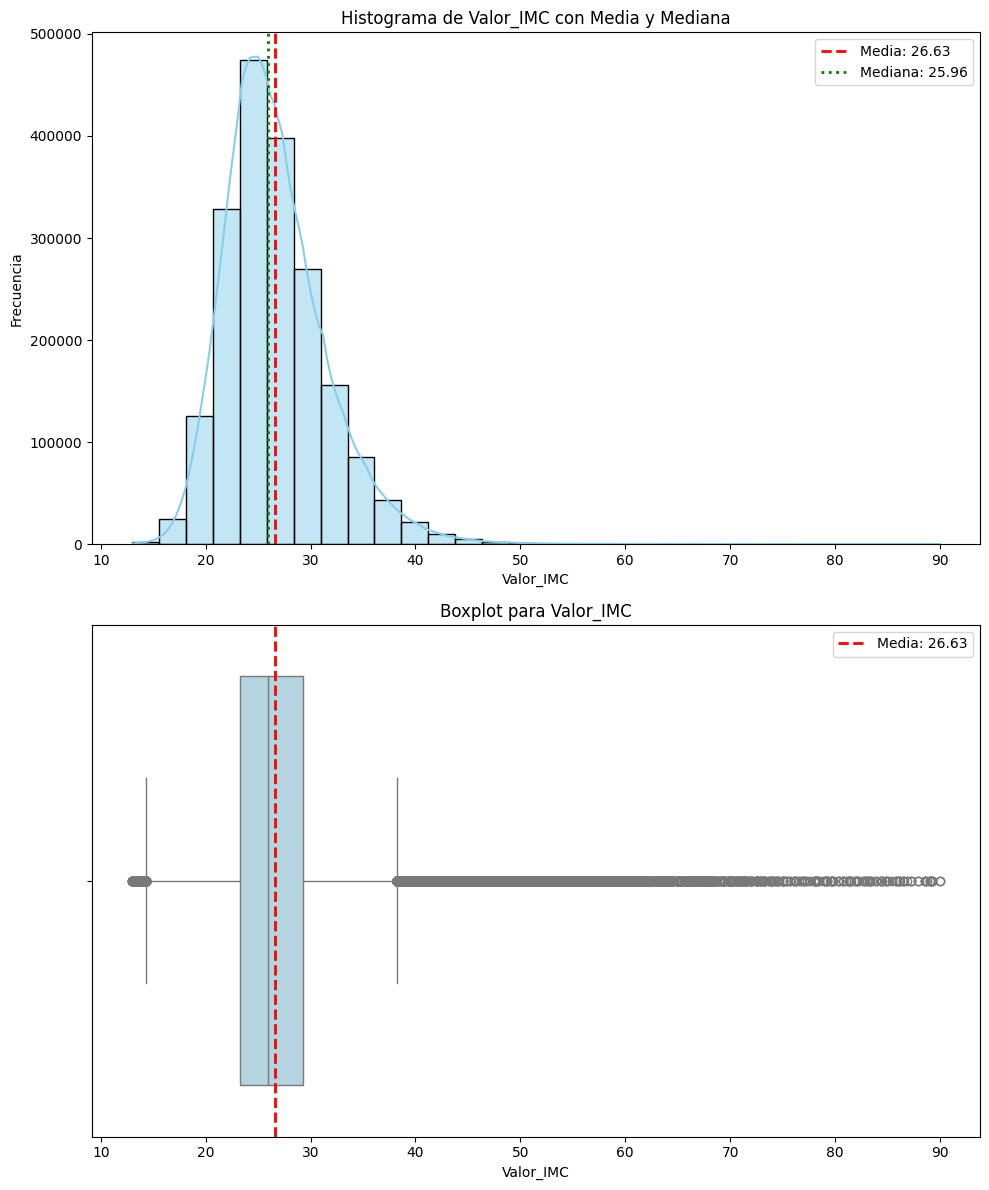

Estadísticas descriptivas para 'Num_Edad_Menopausia':
count   31184.000000
mean       47.651360
std         4.585369
min        36.000000
25%        45.000000
50%        48.000000
75%        51.000000
max        57.000000
Name: Num_Edad_Menopausia, dtype: float64


Número de outliers en Num_Edad_Menopausia: 0




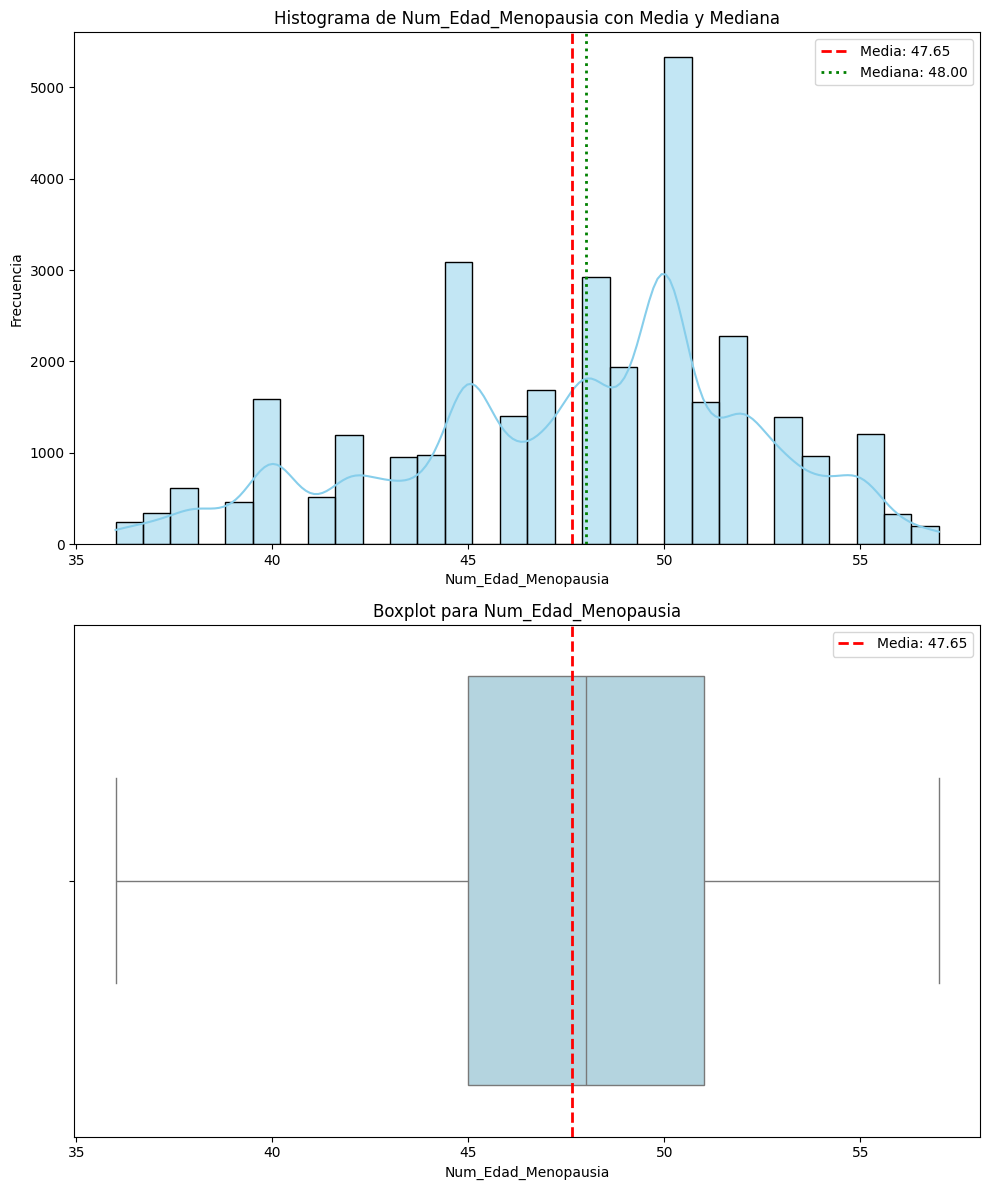

Estadísticas descriptivas para 'Num_Edad_Menarca':
count   888606.000000
mean        11.046907
std          2.065677
min          9.000000
25%          9.000000
50%         11.000000
75%         13.000000
max         17.000000
Name: Num_Edad_Menarca, dtype: float64


Número de outliers en Num_Edad_Menarca: 0




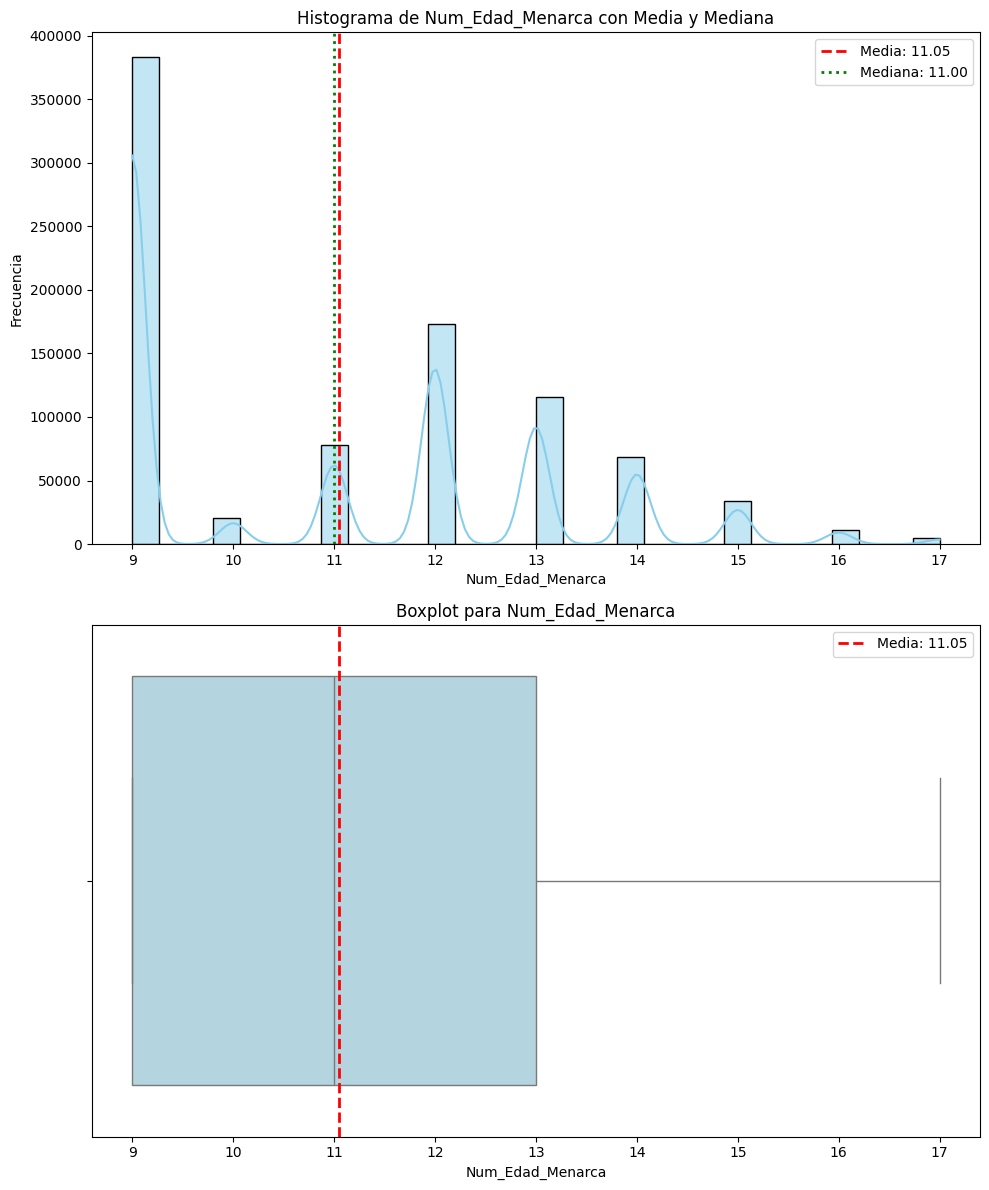

Estadísticas descriptivas para 'Edad':
count   2190210.000000
mean         43.159532
std          16.741103
min          18.000000
25%          29.000000
50%          40.000000
75%          55.000000
max         139.000000
Name: Edad, dtype: float64


Número de outliers en Edad: 2942




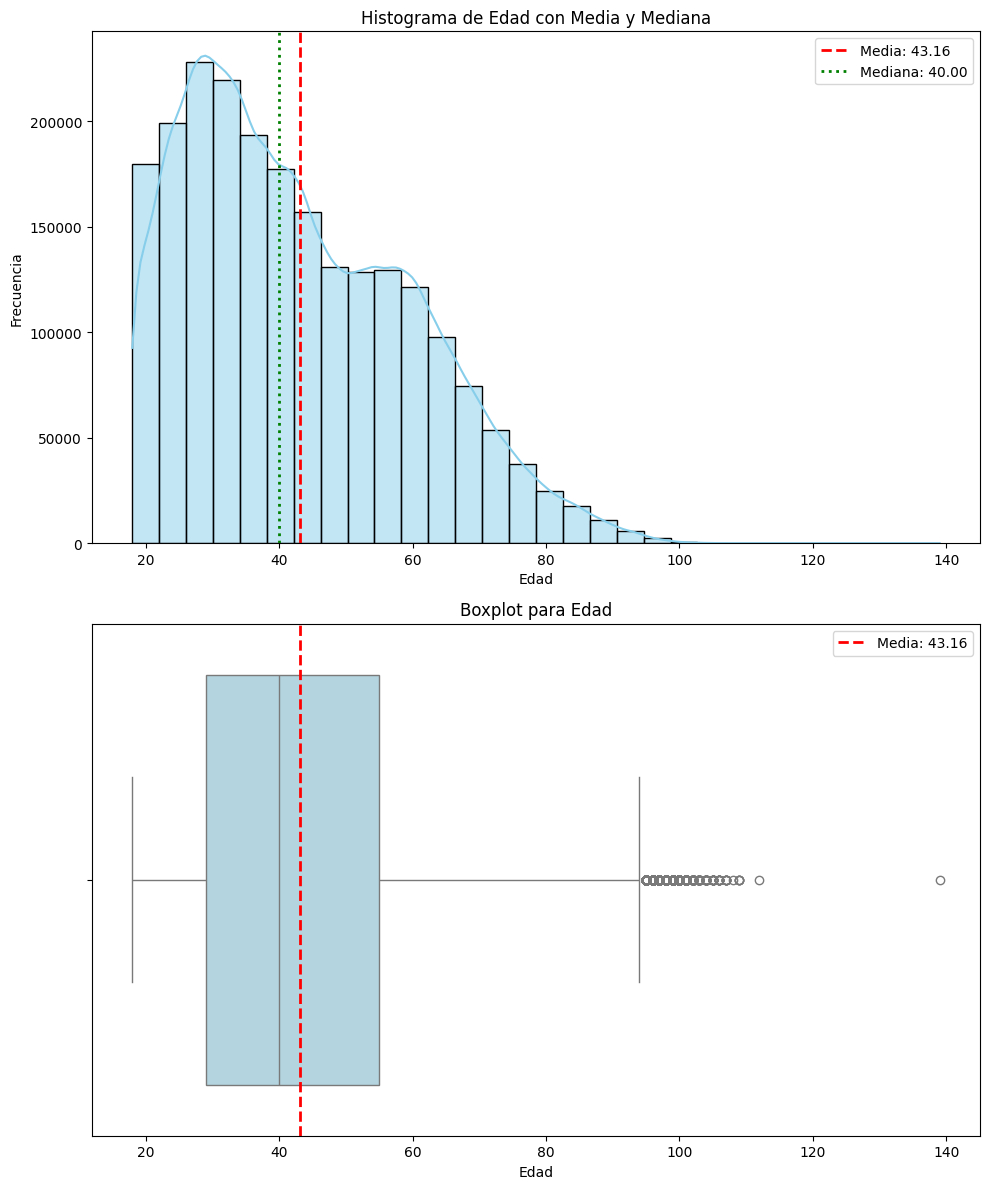

Estadísticas descriptivas para 'Num_Fam_Primer_Grado_Otros':
count   2190210.000000
mean          0.052784
std           0.254169
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: Num_Fam_Primer_Grado_Otros, dtype: float64


Número de outliers en Num_Fam_Primer_Grado_Otros: 101031




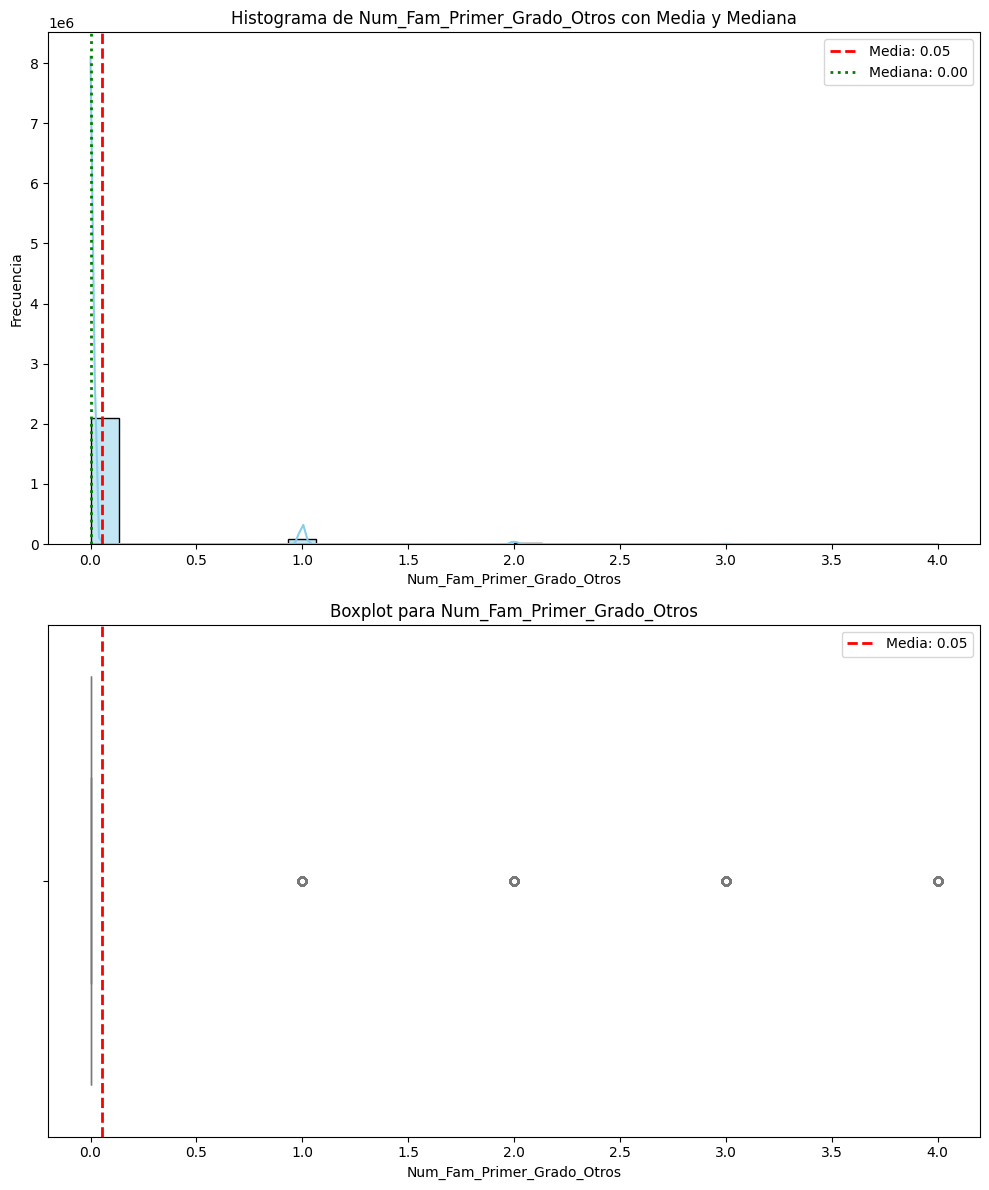

Estadísticas descriptivas para 'Num_Fam_Segundo_Grado_Otros':
count   2190210.000000
mean          0.047167
std           0.230054
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           3.000000
Name: Num_Fam_Segundo_Grado_Otros, dtype: float64


Número de outliers en Num_Fam_Segundo_Grado_Otros: 94850




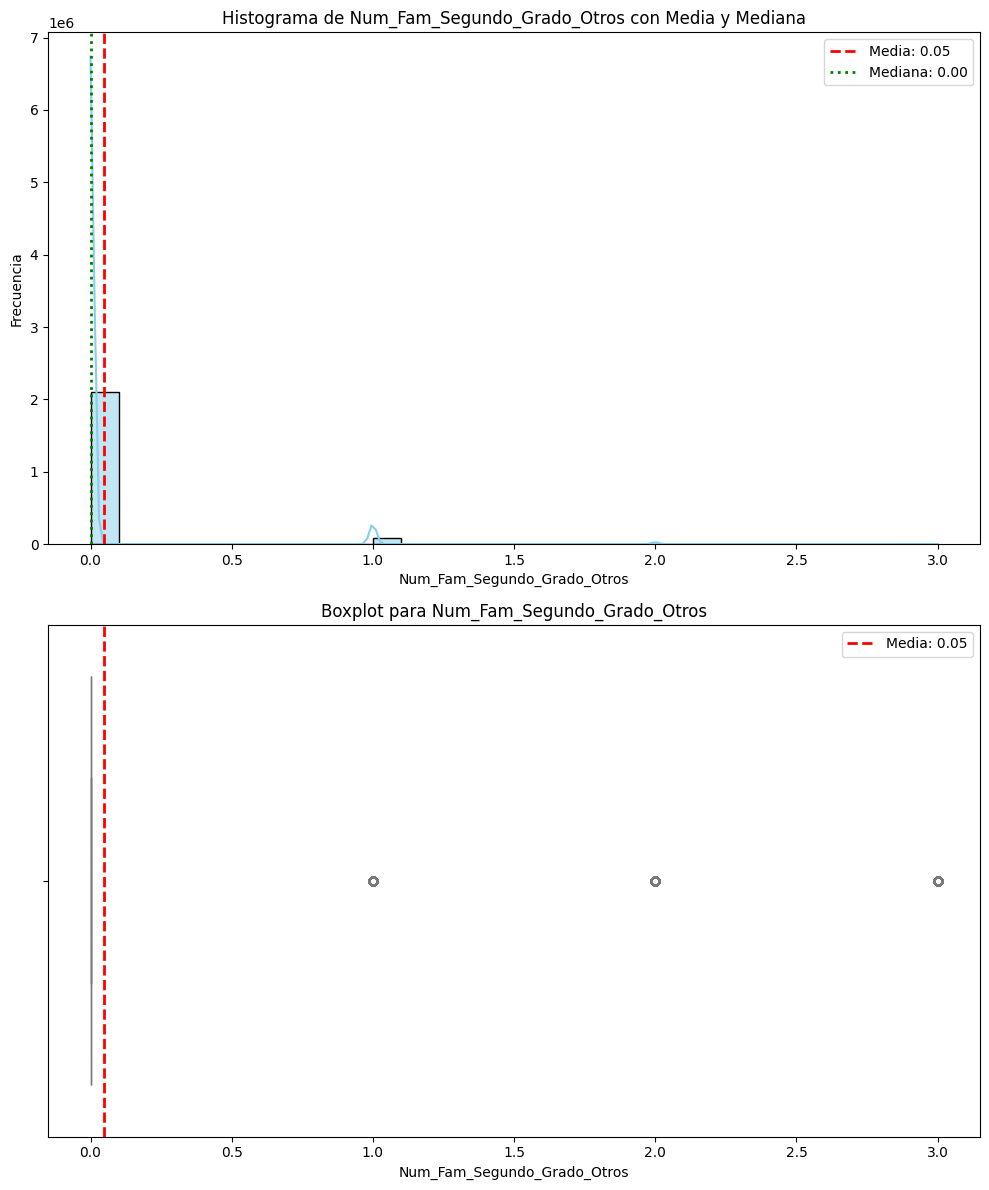

Estadísticas descriptivas para 'Num_Fam_Primer_Grado_CAM':
count   2190210.000000
mean          0.002419
std           0.049989
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           2.000000
Name: Num_Fam_Primer_Grado_CAM, dtype: float64


Número de outliers en Num_Fam_Primer_Grado_CAM: 5204




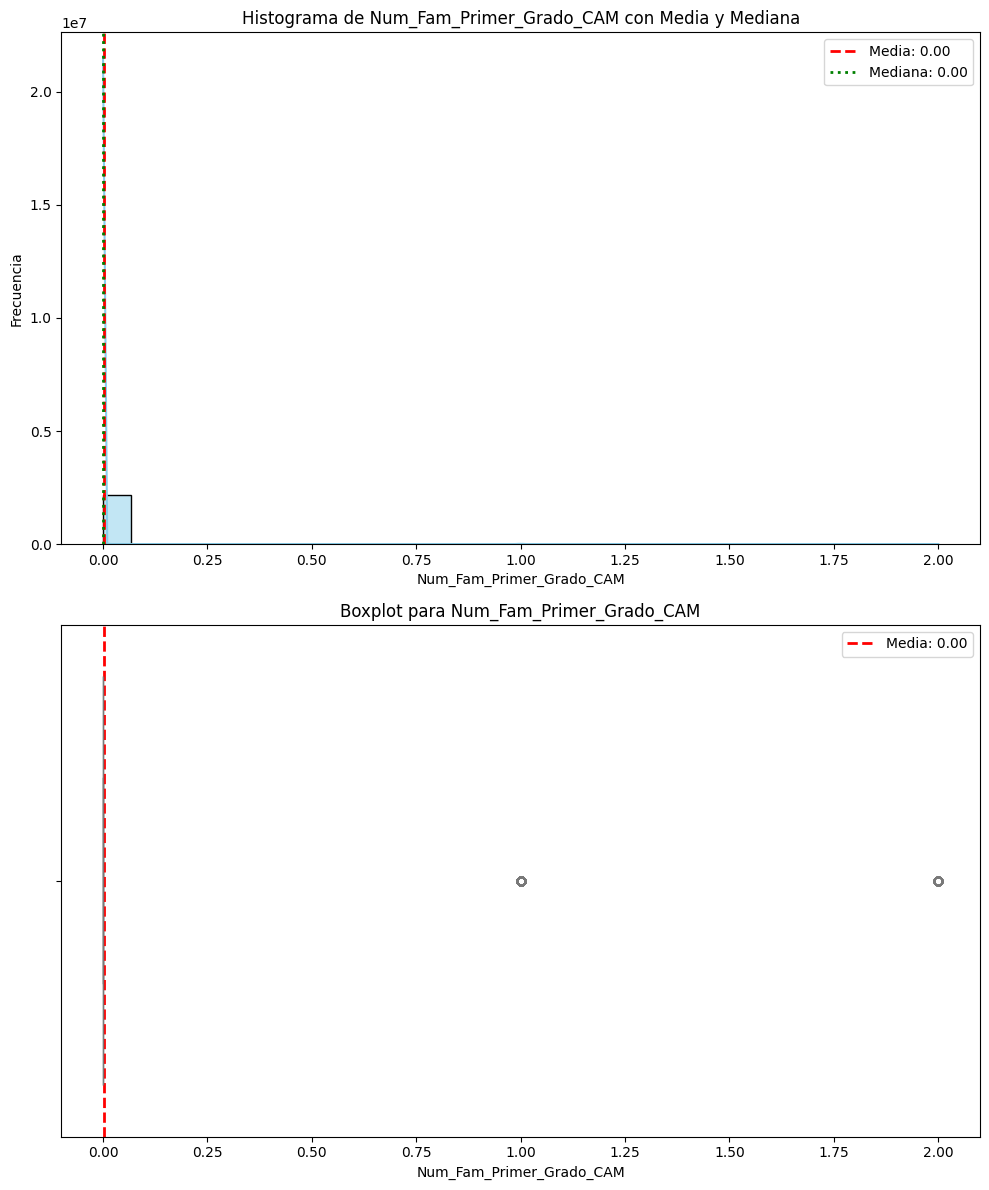

Estadísticas descriptivas para 'Num_Fam_Segundo_Grado_CAM':
count   2190210.000000
mean          0.001418
std           0.038364
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           2.000000
Name: Num_Fam_Segundo_Grado_CAM, dtype: float64


Número de outliers en Num_Fam_Segundo_Grado_CAM: 3045




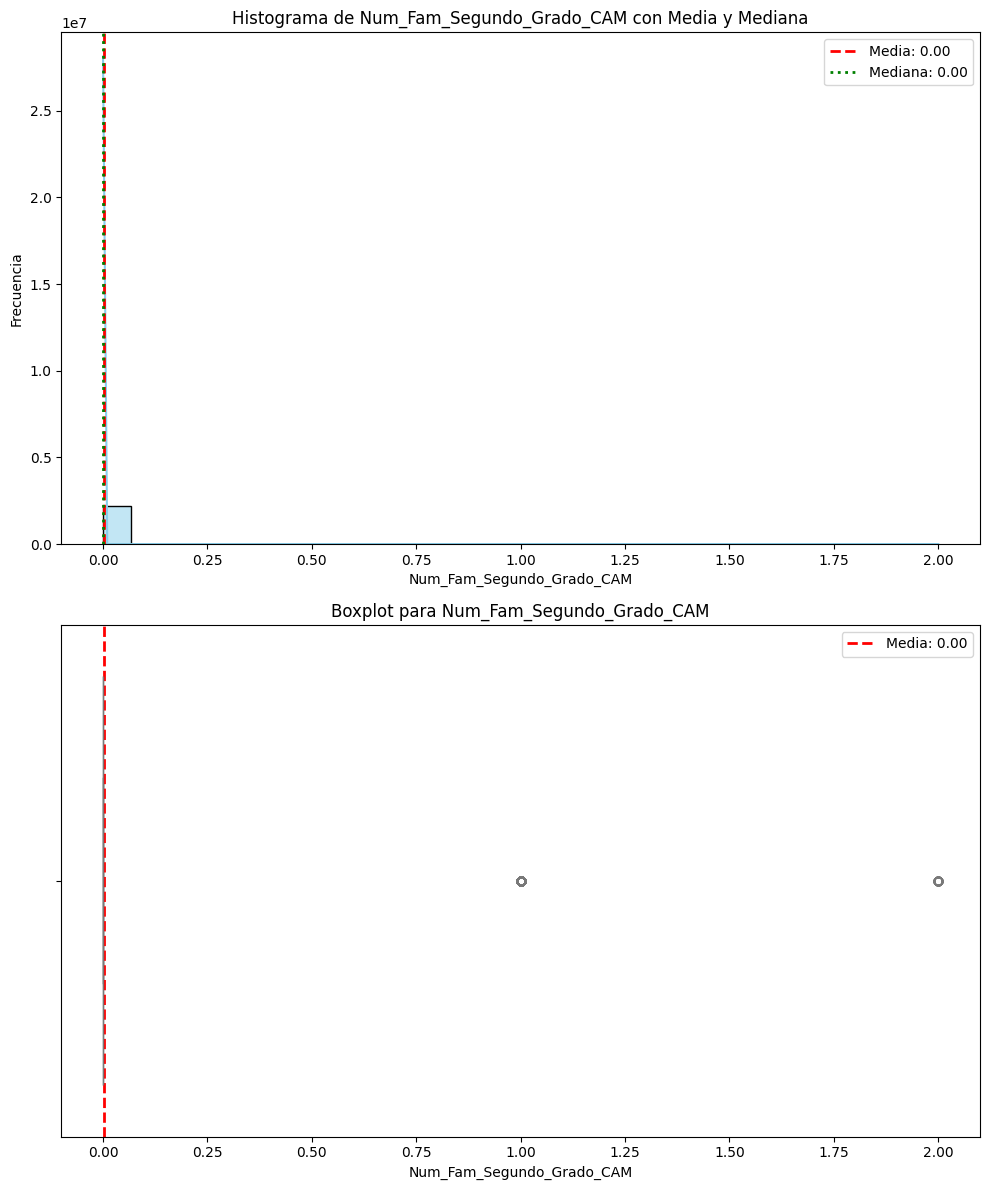

In [47]:
for var in numerical_vars:
    analisis_univariado_num(data_raw, var)

Tratamiento de valores atípicos y faltantes:
- Para el valor del IMC: Reemplazar los outliers con la mediana.
- Para la edad: Dado que el objetivo de estudio es para mujeres hasta los 75 años, se eliminan los registros con una edad superior.
- Para el resto de las variables se decide dejar los valores.

In [48]:
# Paso 1: Identificar valores faltantes y outliers

# Calcular el rango intercuartílico (IQR)
Q1 = data_raw['Valor_IMC'].quantile(0.25)  # Primer cuartil
Q3 = data_raw['Valor_IMC'].quantile(0.75)  # Tercer cuartil
IQR = Q3 - Q1  # Rango intercuartílico

# Límites para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Paso 2: Calcular la mediana sin incluir los outliers
filtered_data = data_raw[(data_raw['Valor_IMC'] >= lower_bound) & (data_raw['Valor_IMC'] <= upper_bound)]
median_no_outliers = filtered_data['Valor_IMC'].median()

print(f"Mediana de 'Valor_IMC' sin outliers: {median_no_outliers}")

# Paso 3: Reemplazar valores faltantes y outliers con la mediana calculada

# Función para reemplazar valores
def replace_outliers_and_missing(value):
    if pd.isnull(value) or value < lower_bound or value > upper_bound:
        return median_no_outliers
    return value


Mediana de 'Valor_IMC' sin outliers: 25.806451612903224


In [49]:
# Aplicar la función a la columna Valor_IMC
data_raw['Valor_IMC'] = data_raw['Valor_IMC'].apply(replace_outliers_and_missing)

In [50]:
# Eliminar registros con edad mayor a 75 años
data_raw = data_raw[data_raw.Edad <= 75]

In [51]:
# Crear pivot table con promedios para cada categoría de 'Ind_CAM'
pd.pivot_table(data=data_raw, index='Ind_CAM', values=numerical_vars, aggfunc=np.median)

<ipython-input-51-41c243956feb>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pd.pivot_table(data=data_raw, index='Ind_CAM', values=numerical_vars, aggfunc=np.median)
<ipython-input-51-41c243956feb>:2: FutureWarning: The provided callable <function median at 0x78b12d224ca0> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  pd.pivot_table(data=data_raw, index='Ind_CAM', values=numerical_vars, aggfunc=np.median)


,Edad,Num_Edad_Menarca,Num_Edad_Menopausia,Num_Fam_Primer_Grado_CAM,Num_Fam_Primer_Grado_Otros,Num_Fam_Segundo_Grado_CAM,Num_Fam_Segundo_Grado_Otros,Valor_IMC
Ind_CAM,,,,,,,,
No,39.000000,11.000000,48.000000,0.000000,0.000000,0.000000,0.000000,25.806452
Si,53.000000,11.000000,49.000000,0.000000,0.000000,0.000000,0.000000,25.806452


### Variables categóricas

In [52]:
cat_vars = ['Ind_CAM','Ind_Frecuencia_Licor', 'Sexo_Cd', 'Raza_Desc',
       'Ind_Terapia_Hormonal', 'Num_Birads', 'Ind_Ooforectomia_Bilateral',
       'Ind_Ant_Fam_CAM', 'Ind_Ant_Radio_Torax',
       'Ind_Ant_Fam_Otros_Esperado']

# Resumen estadístico
data_raw[cat_vars].describe()

,Ind_CAM,Ind_Frecuencia_Licor,Sexo_Cd,Raza_Desc,Ind_Terapia_Hormonal,Num_Birads,Ind_Ooforectomia_Bilateral,Ind_Ant_Fam_CAM,Ind_Ant_Radio_Torax,Ind_Ant_Fam_Otros_Esperado
count,2101366,1386397,2101366,589262,2101366,467828,2101366,2101366,2101366,2101366
unique,2,2,1,6,2,7,2,2,2,2
top,No,No,F,MESTIZO,No,2,No,No,No,No
freq,2084470,1144032,2101366,443964,2097746,277563,2097610,2093874,1735126,1922754


In [53]:
def analisis_univariado_cat(df, variable):
    """
    Analiza una variable categóricas, mostrando:
    1. Tabla con estadísticas descriptivas (describe())
    2. Porcentaje de cada categoría
    3. Gráfico de barras

    Args:
    - df: DataFrame con los datos
    - variable: Nombre de la variable numérica a analizar (str)
    """
    # Verificar si la variable existe en el DataFrame
    if variable not in df.columns:
        print(f"La variable '{variable}' no está en el DataFrame.")
        return

    # Tabla de estadísticas descriptivas
    print(f"Estadísticas descriptivas para '{variable}':")
    print(df[variable].describe())
    print("\n")

    # Porcentaje de cada categoría
    print(df[variable].value_counts(normalize=True) * 100)

    # Gráfico de barras
    plt.figure(figsize=(10, 6))
    sns.countplot(x=variable, data=df)
    plt.title(f'Distribución de {variable}')
    plt.xlabel(variable)
    plt.ylabel('Conteo')
    plt.show()


Estadísticas descriptivas para 'Ind_CAM':
count     2101366
unique          2
top            No
freq      2084470
Name: Ind_CAM, dtype: object


Ind_CAM
No   99.195952
Si    0.804048
Name: proportion, dtype: float64


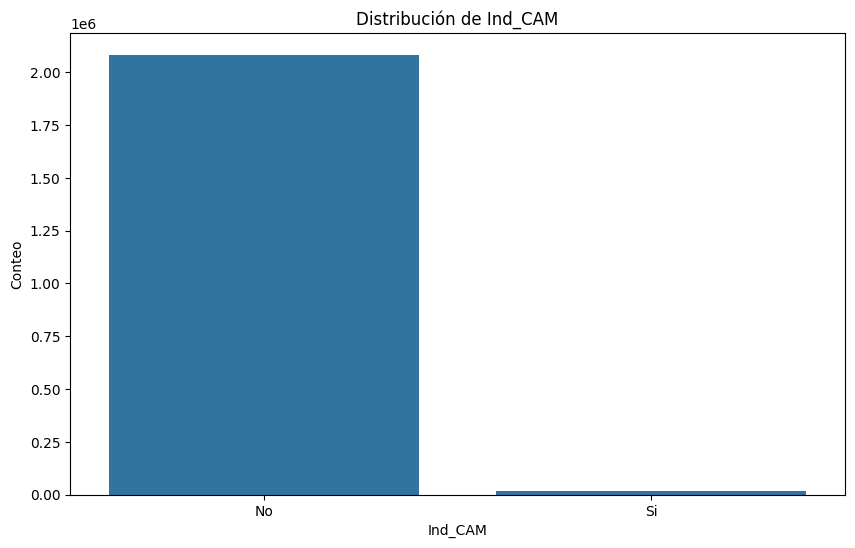

Estadísticas descriptivas para 'Ind_Frecuencia_Licor':
count     1386397
unique          2
top            No
freq      1144032
Name: Ind_Frecuencia_Licor, dtype: object


Ind_Frecuencia_Licor
No   82.518355
Si   17.481645
Name: proportion, dtype: float64


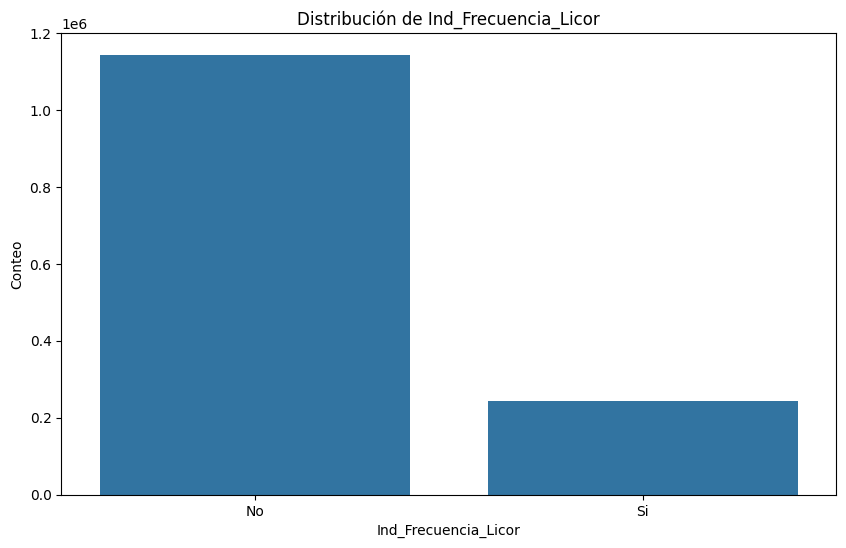

Estadísticas descriptivas para 'Sexo_Cd':
count     2101366
unique          1
top             F
freq      2101366
Name: Sexo_Cd, dtype: object


Sexo_Cd
F   100.000000
Name: proportion, dtype: float64


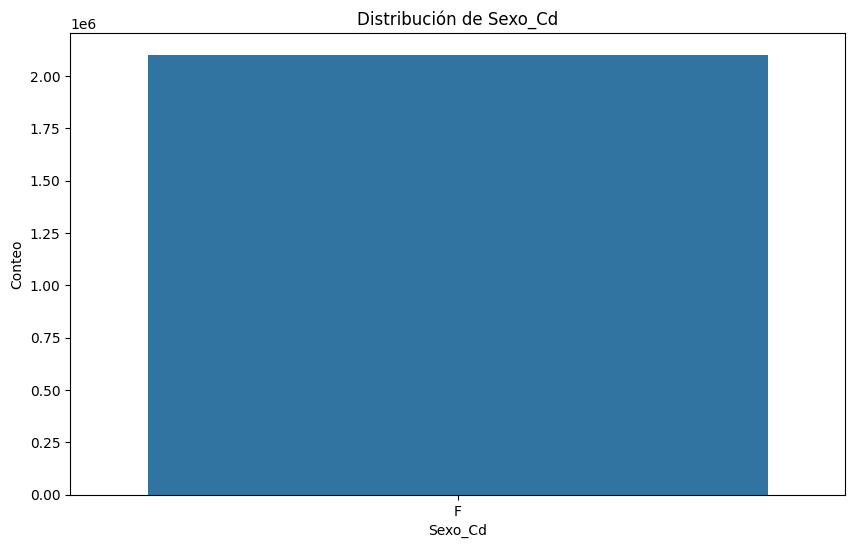

Estadísticas descriptivas para 'Raza_Desc':
count      589262
unique          6
top       MESTIZO
freq       443964
Name: Raza_Desc, dtype: object


Raza_Desc
MESTIZO         75.342377
BLANCO          21.159179
AFROAMERICANO    2.928409
MULATO           0.370294
ZAMBO            0.139666
INDÍGENA         0.060075
Name: proportion, dtype: float64


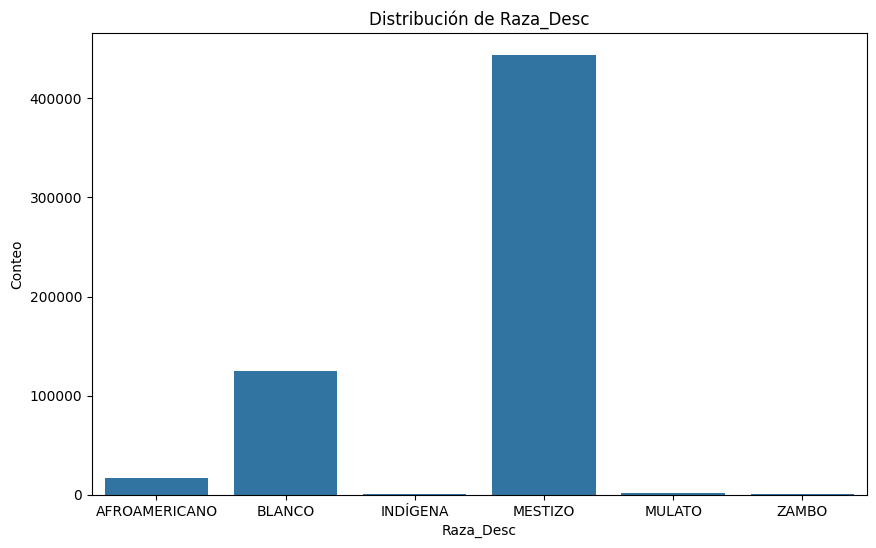

Estadísticas descriptivas para 'Ind_Terapia_Hormonal':
count     2101366
unique          2
top            No
freq      2097746
Name: Ind_Terapia_Hormonal, dtype: object


Ind_Terapia_Hormonal
No   99.827731
Si    0.172269
Name: proportion, dtype: float64


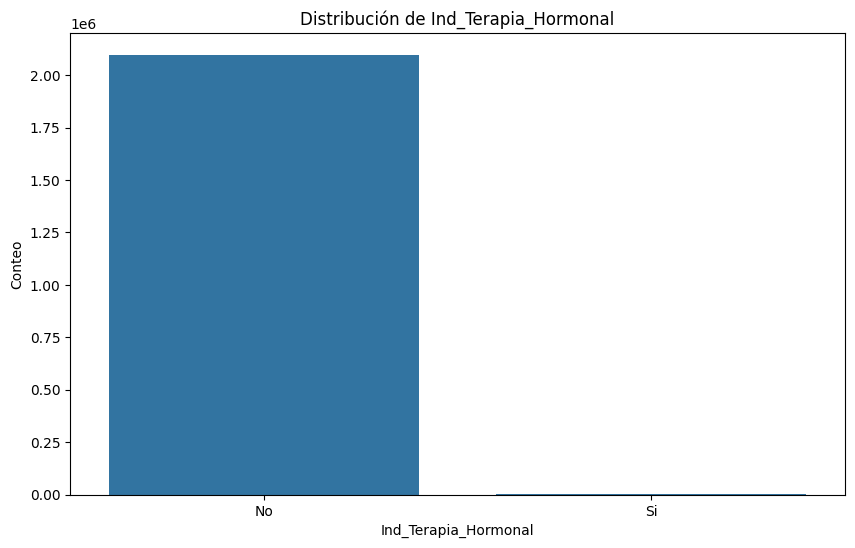

Estadísticas descriptivas para 'Num_Birads':
count     467828
unique         7
top            2
freq      277563
Name: Num_Birads, dtype: object


Num_Birads
2   59.330138
1   22.197474
3    9.757860
0    4.707499
4    3.926229
5    0.061134
6    0.019665
Name: proportion, dtype: float64


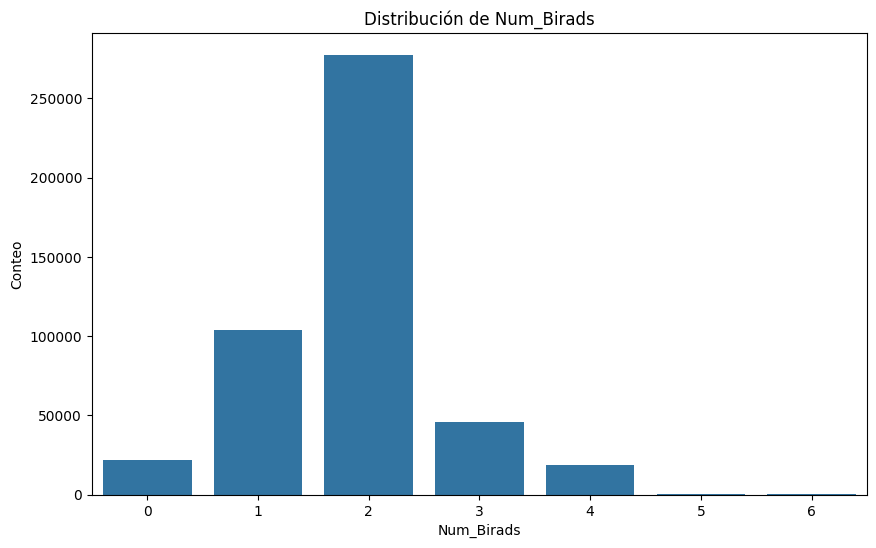

Estadísticas descriptivas para 'Ind_Ooforectomia_Bilateral':
count     2101366
unique          2
top            No
freq      2097610
Name: Ind_Ooforectomia_Bilateral, dtype: object


Ind_Ooforectomia_Bilateral
No   99.821259
Si    0.178741
Name: proportion, dtype: float64


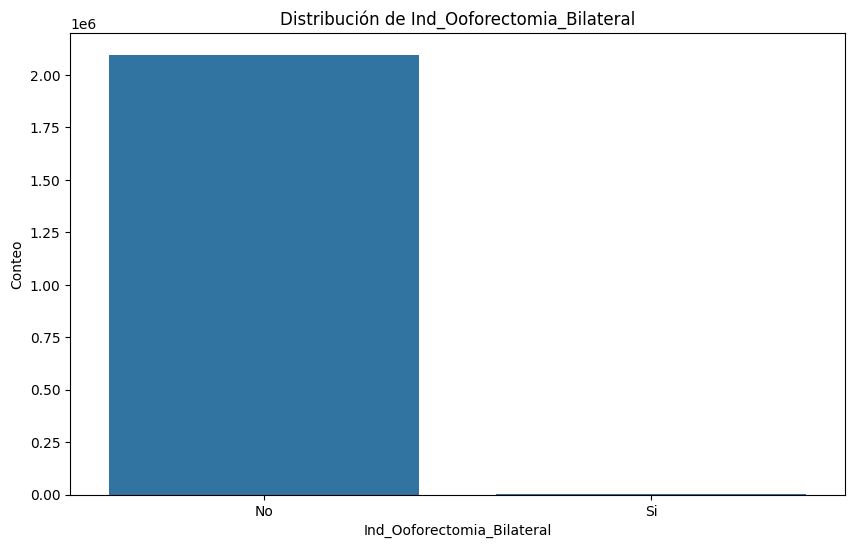

Estadísticas descriptivas para 'Ind_Ant_Fam_CAM':
count     2101366
unique          2
top            No
freq      2093874
Name: Ind_Ant_Fam_CAM, dtype: object


Ind_Ant_Fam_CAM
No   99.643470
Si    0.356530
Name: proportion, dtype: float64


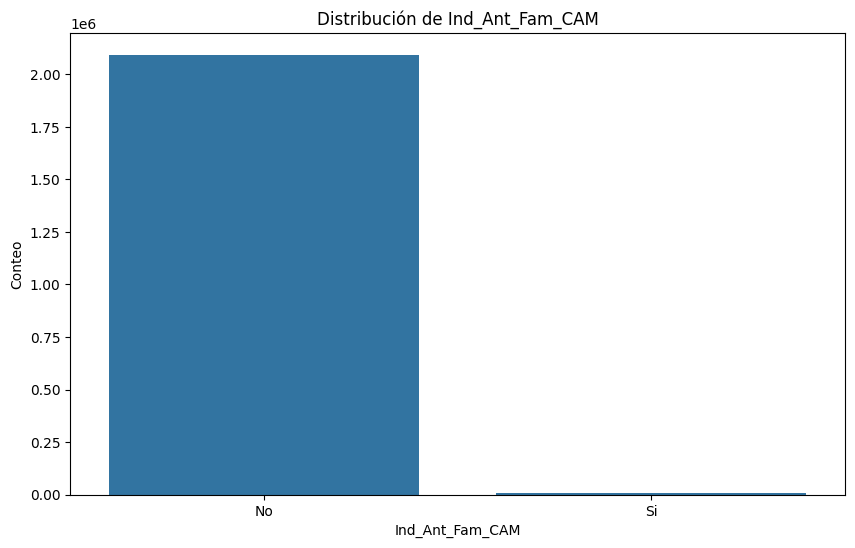

Estadísticas descriptivas para 'Ind_Ant_Radio_Torax':
count     2101366
unique          2
top            No
freq      1735126
Name: Ind_Ant_Radio_Torax, dtype: object


Ind_Ant_Radio_Torax
No   82.571337
Si   17.428663
Name: proportion, dtype: float64


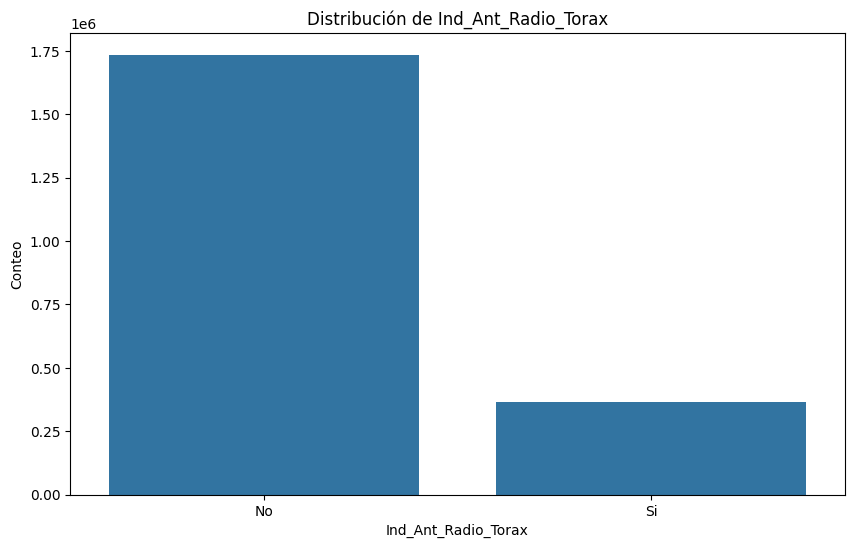

Estadísticas descriptivas para 'Ind_Ant_Fam_Otros_Esperado':
count     2101366
unique          2
top            No
freq      1922754
Name: Ind_Ant_Fam_Otros_Esperado, dtype: object


Ind_Ant_Fam_Otros_Esperado
No   91.500196
Si    8.499804
Name: proportion, dtype: float64


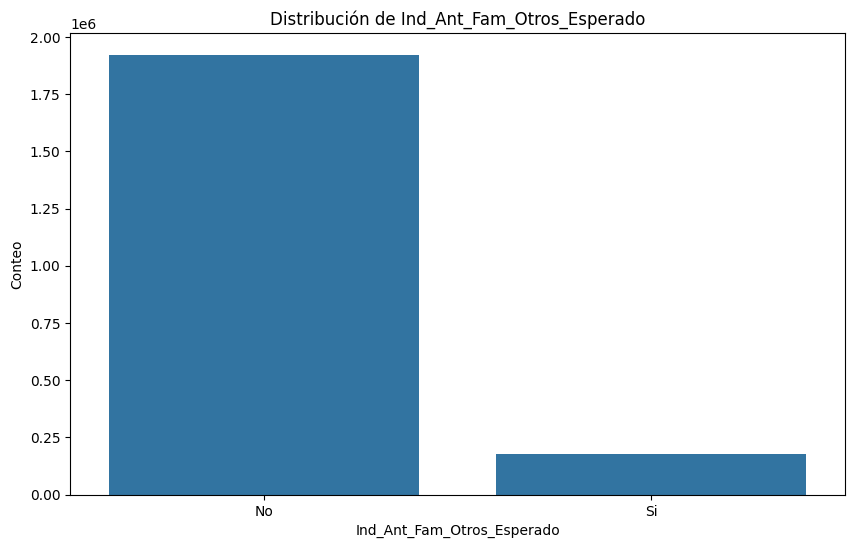

In [54]:
for var in cat_vars:
    analisis_univariado_cat(data_raw, var)

In [55]:
# Calcular percentiles para identificar outliers
Q1 = data_raw['Valor_IMC'].quantile(0.25)
Q3 = data_raw['Valor_IMC'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data_raw[(data_raw['Valor_IMC'] < lower_bound) | (data_raw['Valor_IMC'] > upper_bound)]
print(f'Número de outliers en Valor_IMC: {len(outliers)}')

Número de outliers en Valor_IMC: 55914


## **Análisis bivariado**

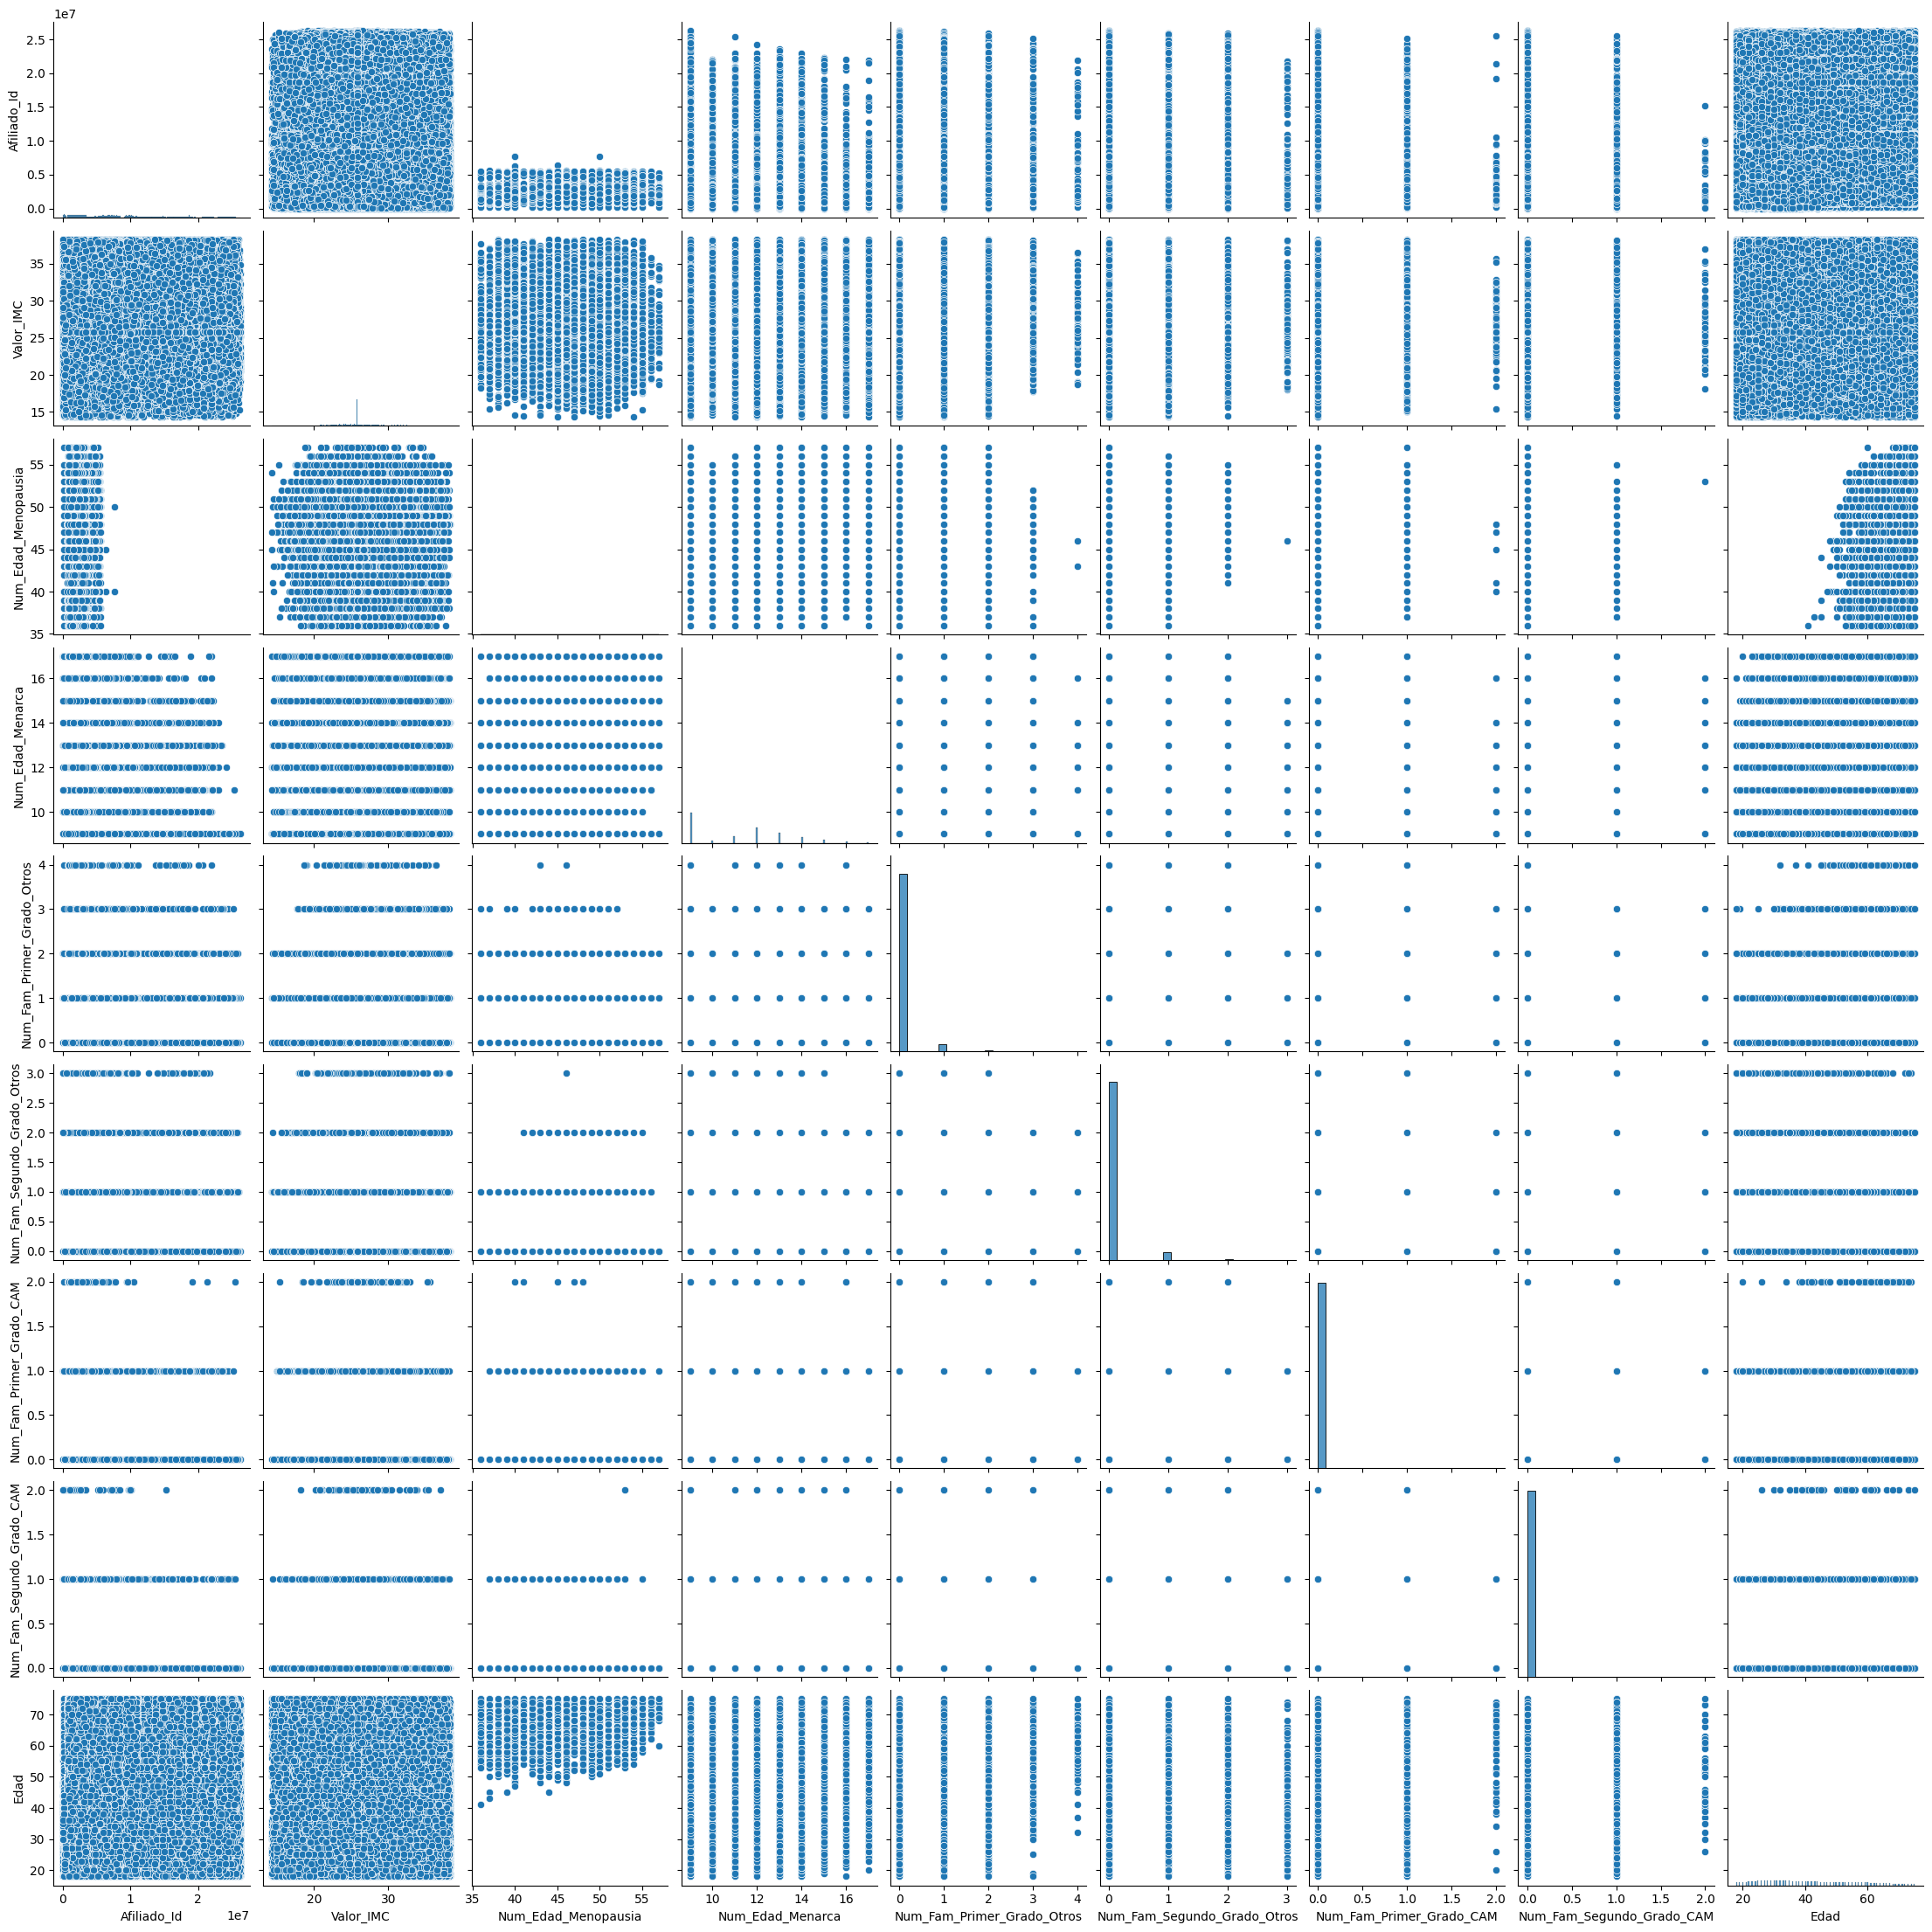

In [69]:
#Histogramas(diagonal principal de las tablas)
df1=data_raw.select_dtypes(exclude= 'object')
sns.pairplot(data = df1);

# Preparación de los datos

Se hace una copia del DataFrame resultante del proceso de comprensión de los datos

In [56]:
data_prep = data_raw.copy()

In [57]:
data_raw.columns

Index(['Afiliado_Id', 'Ind_Frecuencia_Licor', 'Sexo_Cd', 'Raza_Desc',
       'Valor_IMC', 'Num_Edad_Menopausia', 'Num_Edad_Menarca',
       'Ind_Terapia_Hormonal', 'Num_Birads', 'Ind_Ooforectomia_Bilateral',
       'Num_Fam_Primer_Grado_Otros', 'Num_Fam_Segundo_Grado_Otros',
       'Num_Fam_Primer_Grado_CAM', 'Num_Fam_Segundo_Grado_CAM',
       'Ind_Ant_Fam_CAM', 'Ind_Ant_Radio_Torax', 'Edad', 'Ind_CAM',
       'Ind_Ant_Fam_Otros_Esperado'],
      dtype='object')

In [58]:
data_prep

,Afiliado_Id,Ind_Frecuencia_Licor,Sexo_Cd,Raza_Desc,Valor_IMC,Num_Edad_Menopausia,Num_Edad_Menarca,Ind_Terapia_Hormonal,Num_Birads,Ind_Ooforectomia_Bilateral,Num_Fam_Primer_Grado_Otros,Num_Fam_Segundo_Grado_Otros,Num_Fam_Primer_Grado_CAM,Num_Fam_Segundo_Grado_CAM,Ind_Ant_Fam_CAM,Ind_Ant_Radio_Torax,Edad,Ind_CAM,Ind_Ant_Fam_Otros_Esperado
0,6915312,NaN,F,NaN,29.010000,NaN,13.000000,No,NaN,No,0,0,0,0,No,No,34,No,No
1,1520483,NaN,F,MESTIZO,25.806452,NaN,14.000000,No,NaN,No,0,0,0,0,No,No,40,No,No
2,10964151,Si,F,NaN,33.010000,NaN,NaN,No,NaN,No,0,0,0,0,No,Si,41,No,No
3,10814984,No,F,NaN,23.340000,NaN,NaN,No,NaN,No,0,0,0,0,No,No,25,No,No
4,1301025,No,F,MESTIZO,24.670000,NaN,9.000000,No,1,No,0,0,0,0,No,No,61,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2190274,278615,Si,F,NaN,24.767566,NaN,NaN,No,NaN,No,0,0,0,0,No,No,22,No,No
2190275,6455230,No,F,MESTIZO,29.300000,NaN,NaN,No,1,No,0,0,0,0,No,No,28,No,No
2190276,1274761,No,F,MESTIZO,24.300734,NaN,12.000000,No,1,No,1,1,0,0,No,Si,70,No,Si
2190277,4612105,No,F,MESTIZO,25.806452,NaN,12.000000,No,NaN,No,0,0,0,0,No,Si,38,No,No


In [59]:
data_prep.replace({'Si': 1, 'No': 0}, inplace=True)
data_prep

<ipython-input-59-aef0191741a1>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_prep.replace({'Si': 1, 'No': 0}, inplace=True)
<ipython-input-59-aef0191741a1>:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data_prep.replace({'Si': 1, 'No': 0}, inplace=True)
<ipython-input-59-aef0191741a1>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_sile

,Afiliado_Id,Ind_Frecuencia_Licor,Sexo_Cd,Raza_Desc,Valor_IMC,Num_Edad_Menopausia,Num_Edad_Menarca,Ind_Terapia_Hormonal,Num_Birads,Ind_Ooforectomia_Bilateral,Num_Fam_Primer_Grado_Otros,Num_Fam_Segundo_Grado_Otros,Num_Fam_Primer_Grado_CAM,Num_Fam_Segundo_Grado_CAM,Ind_Ant_Fam_CAM,Ind_Ant_Radio_Torax,Edad,Ind_CAM,Ind_Ant_Fam_Otros_Esperado
0,6915312,NaN,F,NaN,29.010000,NaN,13.000000,0,NaN,0,0,0,0,0,0,0,34,0,0
1,1520483,NaN,F,MESTIZO,25.806452,NaN,14.000000,0,NaN,0,0,0,0,0,0,0,40,0,0
2,10964151,1,F,NaN,33.010000,NaN,NaN,0,NaN,0,0,0,0,0,0,1,41,0,0
3,10814984,0,F,NaN,23.340000,NaN,NaN,0,NaN,0,0,0,0,0,0,0,25,0,0
4,1301025,0,F,MESTIZO,24.670000,NaN,9.000000,0,1,0,0,0,0,0,0,0,61,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2190274,278615,1,F,NaN,24.767566,NaN,NaN,0,NaN,0,0,0,0,0,0,0,22,0,0
2190275,6455230,0,F,MESTIZO,29.300000,NaN,NaN,0,1,0,0,0,0,0,0,0,28,0,0
2190276,1274761,0,F,MESTIZO,24.300734,NaN,12.000000,0,1,0,1,1,0,0,0,1,70,0,1
2190277,4612105,0,F,MESTIZO,25.806452,NaN,12.000000,0,NaN,0,0,0,0,0,0,1,38,0,0


In [65]:
#Analizar correlacion entre edad y edad de la menopausia
data_prep_edad = data_prep.dropna(subset=['Num_Edad_Menopausia'])
corr_pears_edad_menopausia = data_prep_edad['Edad'].corr(data_prep_edad['Num_Edad_Menopausia'])
corr_pears_edad_menopausia

0.3243359403744547

In [68]:
 # Categorizar las columnas con valores cualitativos
data_prep['Raza_Desc'] = data_prep['Raza_Desc'].astype('category').cat.codes
# Eliminar las columnas sexo y afiliados
data_prep = data_prep.drop(['Sexo_Cd', 'Afiliado_Id'], axis=1)
data_prep

,Afiliado_Id,Ind_Frecuencia_Licor,Sexo_Cd,Raza_Desc,Valor_IMC,Num_Edad_Menopausia,Num_Edad_Menarca,Ind_Terapia_Hormonal,Num_Birads,Ind_Ooforectomia_Bilateral,Num_Fam_Primer_Grado_Otros,Num_Fam_Segundo_Grado_Otros,Num_Fam_Primer_Grado_CAM,Num_Fam_Segundo_Grado_CAM,Ind_Ant_Fam_CAM,Ind_Ant_Radio_Torax,Edad,Ind_CAM,Ind_Ant_Fam_Otros_Esperado
0,6915312,NaN,F,0,29.010000,NaN,13.000000,0,NaN,0,0,0,0,0,0,0,34,0,0
1,1520483,NaN,F,4,25.806452,NaN,14.000000,0,NaN,0,0,0,0,0,0,0,40,0,0
2,10964151,1,F,0,33.010000,NaN,NaN,0,NaN,0,0,0,0,0,0,1,41,0,0
3,10814984,0,F,0,23.340000,NaN,NaN,0,NaN,0,0,0,0,0,0,0,25,0,0
4,1301025,0,F,4,24.670000,NaN,9.000000,0,1,0,0,0,0,0,0,0,61,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2190274,278615,1,F,0,24.767566,NaN,NaN,0,NaN,0,0,0,0,0,0,0,22,0,0
2190275,6455230,0,F,4,29.300000,NaN,NaN,0,1,0,0,0,0,0,0,0,28,0,0
2190276,1274761,0,F,4,24.300734,NaN,12.000000,0,1,0,1,1,0,0,0,1,70,0,1
2190277,4612105,0,F,4,25.806452,NaN,12.000000,0,NaN,0,0,0,0,0,0,1,38,0,0


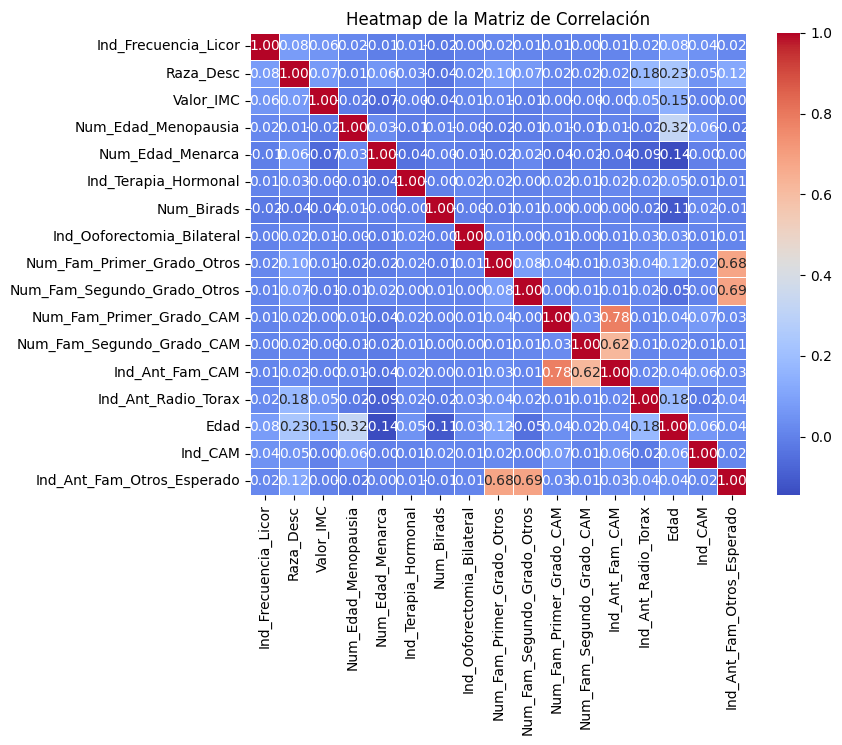

In [76]:
# Crear el heatmap
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
sns.heatmap(data_prep.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Personalizar etiquetas
plt.title("Heatmap de la Matriz de Correlación")
plt.show()